At first, let's import everything necessary:

In [2]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
import time

Now read the data:

In [4]:
train_csv = pd.read_csv("mhc_train.csv")

print(train_csv[0:5])

y = train_csv.pep_class

print(y[0:5])

        mhc   sequence      meas  pep_class
0  HLAA0101  AADFPGIAR  0.084687          0
1  HLAA0101  AADKAAAAY  0.638438          1
2  HLAA0101  AADSFATSY  0.599135          1
3  HLAA0101  AAFLDDNAF  0.084687          0
4  HLAA0101  AAGLPAIFV  0.084687          0
0    0
1    1
2    1
3    0
4    0
Name: pep_class, dtype: int64


Let's build histograms for mhc:

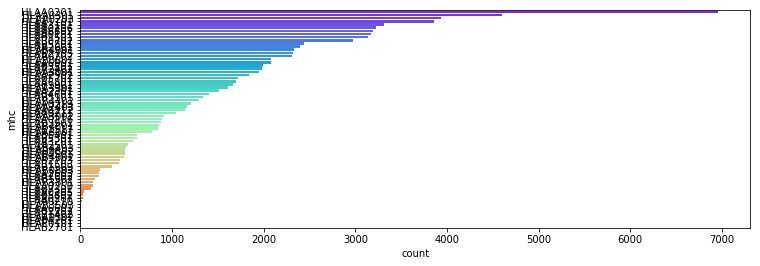

In [7]:
plt.figure(figsize=(12,4))
sns.countplot(y=train_csv['mhc'], 
              palette='rainbow',
              order=train_csv['mhc'].value_counts().index)
plt.show()

Now let's split the "sequence" feature to diffrenet features and encode them.

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

train_csv['seq_1'], train_csv['seq_2'], train_csv['seq_3'], train_csv['seq_4'],\
    train_csv['seq_5'], train_csv['seq_6'], train_csv['seq_7'], train_csv['seq_8'], train_csv['seq_9']= list(train_csv['sequence'].str)


print(train_csv[0:5])


columns = ['mhc', 'seq_1', 'seq_2', 'seq_3', 'seq_4',
       'seq_5', 'seq_6', 'seq_7', 'seq_8', 'seq_9']


def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

# def encoder(df):
#     for col in columns:
#         label_encoder = OneHotEncoder()
#         label_encoder.fit(df[col])
#         df[col] = label_encoder.transform(df[col])
#     return df

train_csv = encoder(train_csv)

y = train_csv['pep_class']
X = train_csv.drop('pep_class', axis=1)
X = X.drop('sequence', axis=1)
X = X.drop('meas', axis=1)

print(X[0:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

   mhc   sequence      meas  pep_class seq_1 seq_2 seq_3 seq_4 seq_5 seq_6  \
0    0  AADFPGIAR  0.084687          0     A     A     D     F     P     G   
1    0  AADKAAAAY  0.638438          1     A     A     D     K     A     A   
2    0  AADSFATSY  0.599135          1     A     A     D     S     F     A   
3    0  AAFLDDNAF  0.084687          0     A     A     F     L     D     D   
4    0  AAGLPAIFV  0.084687          0     A     A     G     L     P     A   

  seq_7 seq_8 seq_9  
0     I     A     R  
1     A     A     Y  
2     T     S     Y  
3     N     A     F  
4     I     F     V  


   mhc  seq_1  seq_2  seq_3  seq_4  seq_5  seq_6  seq_7  seq_8  seq_9
0    0      0      0      2      4     12      5      7      0     14
1    0      0      0      2      8      0      0      0      0     19
2    0      0      0      2     15      4      0     16     15     19
3    0      0      0      4      9      2      2     11      0      4
4    0      0      0      5      9     12      0      7      4     17


Now, let's represent the minimum outcome quality of our model:

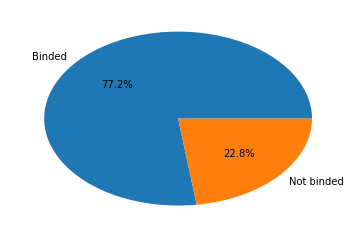

In [6]:
labels = ["Binded",'Not binded']
values = train_csv['pep_class'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,  autopct='%1.1f%%')
plt.show()

So, the minimum outcome accuracy should be 77,3%.

Also, let's represent dependency of the 'meas' feature with the target class:

Now let's represent dependenncy of meas and mhc:

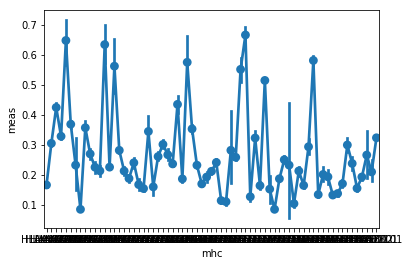

In [18]:
sns.pointplot(x="mhc", y="meas", data=train_csv)

Let's start with linear regression:

In [62]:
from sklearn.metrics import classification_report

classifier1 = LinearRegression()
classifier1.fit(X_train, y_train)

predict = classifier1.predict(X_test)

print(classification_report(y_test, predict > 0.5))

             precision    recall  f1-score   support

          0       0.77      1.00      0.87     21045
          1       0.00      0.00      0.00      6210

avg / total       0.60      0.77      0.67     27255



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Continue with kNN:

In [128]:
list_of_predictions_knn = list()
list_of_test_results_knn = list()
list_of_train_results_knn = list()
list_of_f_knn = list()

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_train)
    list_of_predictions_knn.append(knn_predict)
    list_of_test_results_knn.append(knn.score(X_test, y_test))
    #list_of_train_results_knn.append(knn.score(X_train, y_train))
    list_of_f_knn.append(f1_score(y_train, knn_predict > 0.5))
    print("Predicted with ", i, " neighbours")
    print("Accuracy is: ", knn.score(X_test, y_test))

Predicted with  2  neighbours


Accuracy is:  0.8028251696936342


Predicted with  3  neighbours


Accuracy is:  0.7890295358649789


Predicted with  4  neighbours


Accuracy is:  0.796147495872317


Predicted with  5  neighbours


Accuracy is:  0.787011557512383


Predicted with  6  neighbours


Accuracy is:  0.7893964410199963


Predicted with  7  neighbours


Accuracy is:  0.7844432214272611


Predicted with  8  neighbours


Accuracy is:  0.786167675655843


Predicted with  9  neighbours


Accuracy is:  0.7843698403962576


Predicted with  10  neighbours


Accuracy is:  0.786461199779857


Predicted with  11  neighbours


Accuracy is:  0.7833058154467071


Predicted with  12  neighbours


Accuracy is:  0.78715831957439


Predicted with  13  neighbours


Accuracy is:  0.784296459365254


Predicted with  14  neighbours


Accuracy is:  0.7852871032838011


Predicted with  15  neighbours


Accuracy is:  0.7827187671986792


Predicted with  16  neighbours


Accuracy is:  0.7838928636947349


Predicted with  17  neighbours


Accuracy is:  0.7823518620436617


Predicted with  18  neighbours


Accuracy is:  0.7833791964777105


Predicted with  19  neighbours


Accuracy is:  0.7824252430746652


Max test result:  0.8028251696936342  takes  1  neighbors
Max test f-measure:  0.7212520720095603  takes  2  neighbors


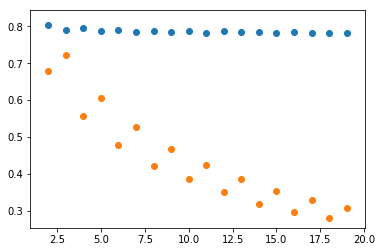

In [129]:
print("Max test result: ", max(list_of_test_results_knn), 
      " takes ", (list_of_test_results_knn.index(max(list_of_test_results_knn))+1), " neighbors")

plt.scatter(x=list((range(2, 20))), y=list_of_test_results_knn)

print("Max test f-measure: ", max(list_of_f_knn), 
      " takes ", (list_of_f_knn.index(max(list_of_f_knn))+1), " neighbors")

plt.scatter(x=list((range(2, 20))), y=list_of_f_knn)

And try again with a bigger step to look deeper.

Predicted with  10  neighbours


Accuracy is:  0.786461199779857


Predicted with  20  neighbours


Accuracy is:  0.7826453861676756


Predicted with  30  neighbours


Accuracy is:  0.7812144560631077


Predicted with  40  neighbours


Accuracy is:  0.779600073381031


Predicted with  50  neighbours


Accuracy is:  0.7789396441019997


Predicted with  60  neighbours


Accuracy is:  0.7778756191524491


Predicted with  70  neighbours


Accuracy is:  0.7771051183269125


Predicted with  80  neighbours


Accuracy is:  0.7768482847184003


Predicted with  90  neighbours


Accuracy is:  0.777031737295909
Max test result:  0.786461199779857  takes  10  neighbors
Max test f-measure:  0.38554466739254417  takes  10  neighbors


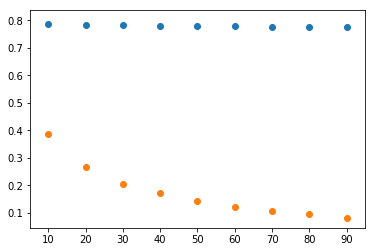

In [130]:
list_of_predictions_knn = list()
list_of_test_results_knn = list()
list_of_train_results_knn = list()
list_of_f_knn = list()

for i in range(10, 100, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_train)
    list_of_predictions_knn.append(knn_predict)
    list_of_test_results_knn.append(knn.score(X_test, y_test))
    #list_of_train_results_knn.append(knn.score(X_train, y_train))
    list_of_f_knn.append(f1_score(y_train, knn_predict > 0.5))
    print("Predicted with ", i, " neighbours")
    print("Accuracy is: ", knn.score(X_test, y_test))
    
    
print("Max test result: ", max(list_of_test_results_knn), 
      " takes ", (list_of_test_results_knn.index(max(list_of_test_results_knn))+1)*10, " neighbors")

plt.scatter(x=list((range(10, 100, 10))), y=list_of_test_results_knn)

print("Max test f-measure: ", max(list_of_f_knn), 
      " takes ", (list_of_f_knn.index(max(list_of_f_knn))+1)*10, " neighbors")

plt.scatter(x=list((range(10, 100, 10))), y=list_of_f_knn)

Magic didn't happen and next classifier we'll try to use is Logistic Regression:

Train result: 0.7721518987341772
Accuracy: 0.7721518987341772
######################################################


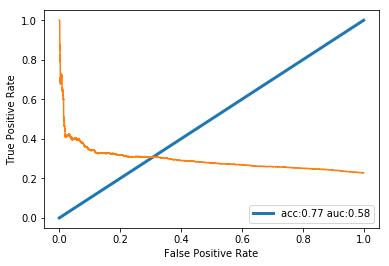

In [134]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

prediction = logistic_model.predict(X_test)

#print("Test result:", logistic_model.score(X_test, y_test))

print("Train result:", logistic_model.score(X_train, y_train))

print("Accuracy:", accuracy_score(y_test, prediction > 0.5))

#print("AUC-ROC:", roc_auc_score(y_test, prediction))

#print("F-measure: ", f1_score(y_test, prediction))

print("######################################################")
logistic_model_proba = LogisticRegression()

logistic_model_proba.fit(X_train, y_train)

prediction_proba = logistic_model.predict_proba(X_test)


# Now let's create the ROC-curve and PR-curve to represent our model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fpr, tpr, _ = roc_curve(y_test, prediction)
acc = logistic_model.score(X_test, y_test)
auc = roc_auc_score(y_test, prediction_proba[:, 1])
plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba[:, 1])

#plt.plot(fpr, tpr)

plt.plot(recall, precision)

Next step we'll take is DecisionTree model:

In [78]:
decision_tree = DecisionTreeClassifier(random_state=3)

decision_tree.fit(X_train, y_train)

prediction_tree = decision_tree.predict(X_test)

print("Test result (accuracy):", decision_tree.score(X_test, y_test))

print("Accuracy:", accuracy_score(y_test, prediction_tree))

auc_roc_tree = roc_auc_score(y_test, prediction_tree)

print("AUC-ROC:", auc_roc_tree)

print("F-measure: ", f1_score(y_test, prediction_tree > 0.48))

print("######################################################")
decision_tree_proba = DecisionTreeClassifier(random_state=3)

decision_tree_proba.fit(X_train, y_train)

prediction_tree_proba = decision_tree_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_tree_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_tree_proba)

print("AUC-ROC:", auc_roc_tree)

Test result (accuracy): 0.8191891396074115
Accuracy: 0.8191891396074115
AUC-ROC: 0.7473825928565772
F-measure:  0.6080178173719376
######################################################


Accuracy: 0.8191891396074115
AUC-ROC: 0.7473825928565772


Let's try to use bagging in addition:

In [79]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=3), n_estimators=100)

bagging.fit(X_train, y_train)

prediction_bagging = bagging.predict(X_test)

auc_roc_tree = roc_auc_score(y_test, prediction_bagging)

print("######################################################")
bagging_proba = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=3), n_estimators=100)

bagging_proba.fit(X_train, y_train)

prediction_bagging_proba = bagging_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_bagging_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_bagging_proba)

print("AUC-ROC:", auc_roc_tree)

print("F-measure: ", f1_score(y_test, prediction_bagging > 0.48))

######################################################


Accuracy: 0.8588882773802972
AUC-ROC: 0.8994036014383718
F-measure:  0.6628359264497877


Let's continue and bootstrap our sample:

And finally, let's use Random Forest classifier:

In [125]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
forest_f_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(50, 1010, 50):
    
    decision_forest = RandomForestClassifier(random_state=3, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=3, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    accuracy_forest_results_proba.append(accuracy_score(y_test, prediction_forest_pr > 0.5))

    auc_roc_forest = roc_auc_score(y_test, prediction_forest)
    
    forest_f_results.append(f1_score(y_test, prediction_forest > 0.5))

    auc_roc_forest_results.append(auc_roc_forest)
    auc_roc_forest_results_proba.append(roc_auc_score(y_test, prediction_forest_pr))
    if j % 50 == 0:
        cur_time = time.time() - cur_time
        if j % 100 != 0:
            time_list.append(cur_time)
            print('Number of trees:', j)
            print("Prediction completed by", j/10, "%")
            print("Took ", cur_time, " seconds")
            print("--------------------")
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Number of trees: 50
Prediction completed by 5.0 %
Took  9.351861953735352  seconds
--------------------


Number of trees: 150
Prediction completed by 15.0 %
Took  36.12915086746216  seconds
--------------------


Number of trees: 250
Prediction completed by 25.0 %
Took  80.27787804603577  seconds
--------------------


Number of trees: 350
Prediction completed by 35.0 %
Took  142.2970950603485  seconds
--------------------


Number of trees: 450
Prediction completed by 45.0 %
Took  222.05153822898865  seconds
--------------------


Number of trees: 550
Prediction completed by 55.0 %
Took  319.376992225647  seconds
--------------------


Number of trees: 650
Prediction completed by 65.0 %
Took  434.7843670845032  seconds
--------------------


Number of trees: 750
Prediction completed by 75.0 %
Took  569.8850998878479  seconds
--------------------


Number of trees: 850
Prediction completed by 85.0 %
Took  720.1504199504852  seconds
--------------------


Number of trees: 950
Prediction completed by 95.0 %
Took  888.8089919090271  seconds
--------------------


Prediction completed by 100%
Prediction took  1866.1729080677032  seconds


Max test result:  0.8455696202531645  takes  900  trees
Max accuracy result:  0.8455696202531645  takes  900  trees
Max auc-roc result:  0.7337029117499538  takes  900  trees
Max accuracy result with proba:  0.8455696202531645  takes  900  trees
Max auc-roc result with proba:  0.8902886116668177  takes  900  trees
Max F-measure:  0.609155910483796  takes  900  trees


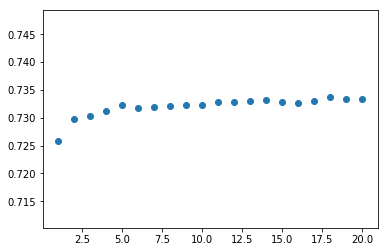

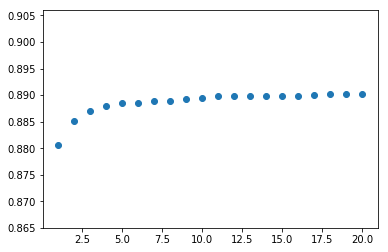

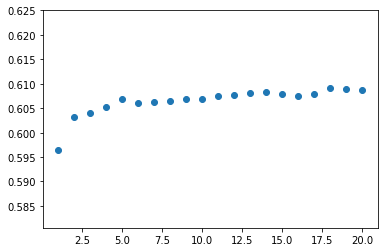

Time taken via number of trees:


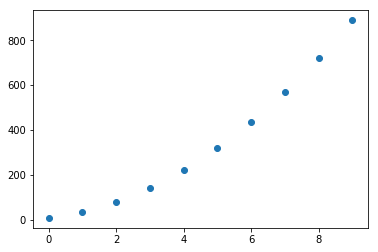

In [126]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*50, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*50, " trees")

print("Max auc-roc result: ", max(auc_roc_forest_results), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*50, " trees")

print("Max accuracy result with proba: ", max(accuracy_forest_results_proba), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*50, " trees")

print("Max auc-roc result with proba: ", max(auc_roc_forest_results_proba), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*50, " trees")

print("Max F-measure: ", max(forest_f_results), " takes ", (forest_f_results.index(max(forest_f_results))+1)*50, " trees")


plt.scatter(x=list((range(1, 21))), y=auc_roc_forest_results)
plt.show()
plt.scatter(x=list((range(1, 21))), y=auc_roc_forest_results_proba)
plt.show()
plt.scatter(x=list((range(1, 21))), y=forest_f_results)
plt.show()

print("Time taken via number of trees:")
plt.scatter(x=list(range(0, 10)), y=time_list)
plt.show()

In [116]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
forest_f_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(50, 500, 20):
    
    decision_forest = RandomForestClassifier(random_state=3, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=3, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    accuracy_forest_results_proba.append(accuracy_score(y_test, prediction_forest_pr > 0.5))

    auc_roc_forest = roc_auc_score(y_test, prediction_forest)
    
    forest_f_results.append(f1_score(y_test, prediction_forest > 0.5))

    auc_roc_forest_results.append(auc_roc_forest)
    auc_roc_forest_results_proba.append(roc_auc_score(y_test, prediction_forest_pr))
    if j % 50 == 0:
        cur_time = time.time() - cur_time
        if j % 100 != 0:
            time_list.append(cur_time)
            print('Number of trees:', j)
            print("Prediction completed by", j/10, "%")
            #print("Took ", cur_time, " seconds")
            print("--------------------")
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Number of trees: 50
Prediction completed by 5.0 %
--------------------


Number of trees: 150
Prediction completed by 15.0 %
--------------------


Number of trees: 250
Prediction completed by 25.0 %
--------------------


Number of trees: 350
Prediction completed by 35.0 %
--------------------


Number of trees: 450
Prediction completed by 45.0 %
--------------------


Prediction completed by 100%
Prediction took  1102.1020929813385  seconds


Max test result:  0.8452760961291507  takes  440  trees
Max accuracy result:  0.8452760961291507  takes  440  trees
Max auc-roc result:  0.7328317626250627  takes  440  trees
Max accuracy result with proba:  0.8452760961291507  takes  440  trees
Max auc-roc result with proba:  0.8895557483790772  takes  440  trees
Max F-measure:  0.6078303729191854  takes  440  trees


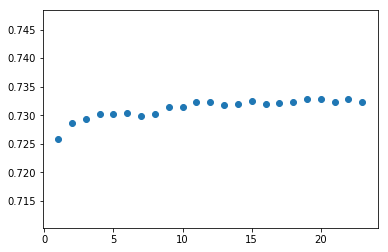

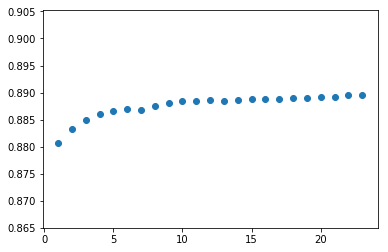

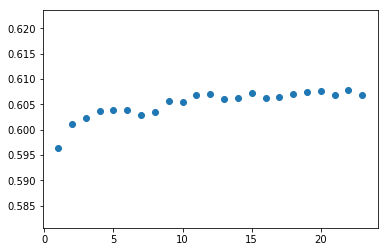

In [124]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*20, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*20, " trees")

print("Max auc-roc result: ", max(auc_roc_forest_results), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*20, " trees")

print("Max accuracy result with proba: ", max(accuracy_forest_results_proba), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*20, " trees")

print("Max auc-roc result with proba: ", max(auc_roc_forest_results_proba), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*20, " trees")

print("Max F-measure: ", max(forest_f_results), " takes ", (forest_f_results.index(max(forest_f_results))+1)*20, " trees")


plt.scatter(x=list((range(1, 24))), y=auc_roc_forest_results)
plt.show()
plt.scatter(x=list((range(1, 24))), y=auc_roc_forest_results_proba)
plt.show()
plt.scatter(x=list((range(1, 24))), y=forest_f_results)
plt.show()

I suppose that the number of trees can be increased infinitely, as soon as you have computing power and the quality of a model will increase.

Let's check this hypothesis by increasing the number of trees to an enormous value:

In [137]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
forest_f_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(5000, 7001, 1000):
    
    decision_forest = RandomForestClassifier(random_state=3, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=3, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    accuracy_forest_results_proba.append(accuracy_score(y_test, prediction_forest_pr > 0.5))

    auc_roc_forest = roc_auc_score(y_test, prediction_forest)
    
    forest_f_results.append(f1_score(y_test, prediction_forest > 0.5))

    auc_roc_forest_results.append(auc_roc_forest)
    auc_roc_forest_results_proba.append(roc_auc_score(y_test, prediction_forest_pr))
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Prediction completed by 100%
Prediction took  3636.70028591156  seconds


Max test result:  0.8456796917996697  takes  6000  trees
Max accuracy result:  0.8456796917996697  takes  6000  trees
Max auc-roc result:  0.7340579710144929  takes  6000  trees
Max accuracy result with proba:  0.8456796917996697  takes  6000  trees
Max auc-roc result with proba:  0.890784332629757  takes  6000  trees
Max F-measure:  0.6096881959910914  takes  6000  trees


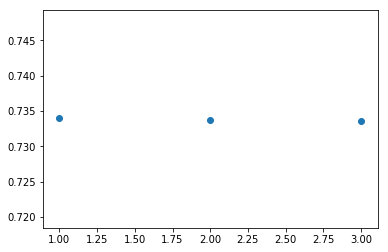

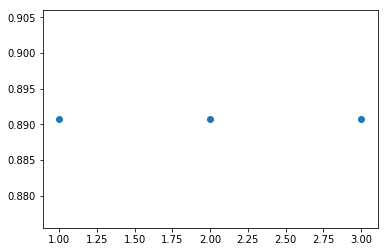

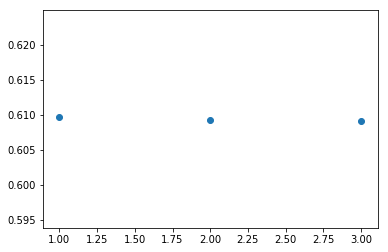

In [140]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*1000 + 5000, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*1000 + 5000, " trees")

print("Max auc-roc result: ", max(auc_roc_forest_results), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*1000 + 5000, " trees")

print("Max accuracy result with proba: ", max(accuracy_forest_results_proba), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*1000 + 5000, " trees")

print("Max auc-roc result with proba: ", max(auc_roc_forest_results_proba), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*1000 + 5000, " trees")

print("Max F-measure: ", max(forest_f_results), " takes ", (forest_f_results.index(max(forest_f_results))+1)*1000 + 5000, " trees")


plt.scatter(x=list((range(1, 4))), y=auc_roc_forest_results)
plt.show()
plt.scatter(x=list((range(1, 4))), y=auc_roc_forest_results_proba)
plt.show()
plt.scatter(x=list((range(1, 4))), y=forest_f_results)
plt.show()

As we can see, the hypothesis confirmed, but the model did not increased well.

So the best approach is to teach the model, depending on how much time/computing power you can afford to reach the best quality.

Finally, let's take a look at importances of different features:

[0.29467865 0.07666893 0.10727357 0.07514679 0.07268197 0.07130399
 0.07281346 0.0733637  0.07148079 0.08458815]


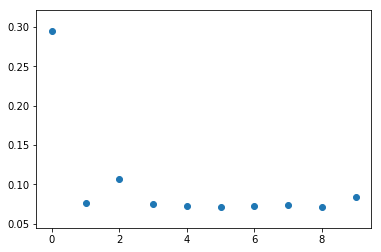

In [142]:
importances = list(decision_forest.feature_importances_)

number = list(range(0, 10, 1))

print(decision_forest.feature_importances_)

plt.scatter(x=number, y=importances)

This is quite interesting, seems like different mhc codes give different rate of a peptide class.